# Data Visualisation

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Load Data

In [2]:
df = pd.read_csv('data/fandango_scrape.csv')
df.head(5)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    str    
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), str(1)
memory usage: 15.9 KB


In [4]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [6]:
print('les valeurs manquantes :', df.isna().sum().sum())
print('les doublons :', df.duplicated().sum())

les valeurs manquantes : 0
les doublons : 0


<Axes: xlabel='RATING', ylabel='VOTES'>

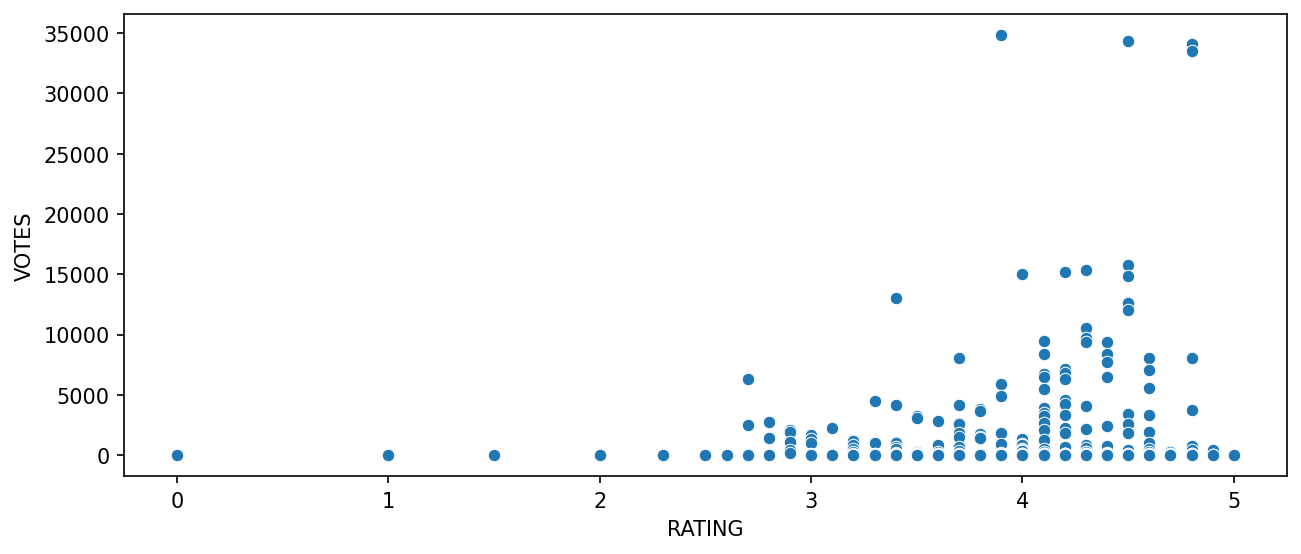

In [7]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='RATING',y='VOTES')

<Axes: >

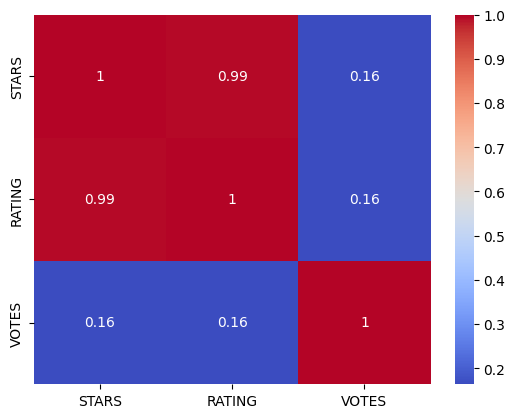

In [11]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm')

Une forte corrélation entre STARS et RATING, montre que si évaluation est bon qui entraîne une bonne note.

le nom de film est composé de NOM et ANNEE donc on les sépare:

In [18]:
df['YEAR'] = df['FILM'].str.extract(r'\((\d+)\)').astype(int)
df['FILM'] = df['FILM'].str.replace(r'\s*\(\d+\)', '', regex=True)
df.head(5)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey,4.0,3.9,34846,2015
1,Jurassic World,4.5,4.5,34390,2015
2,American Sniper,5.0,4.8,34085,2015
3,Furious 7,5.0,4.8,33538,2015
4,Inside Out,4.5,4.5,15749,2015


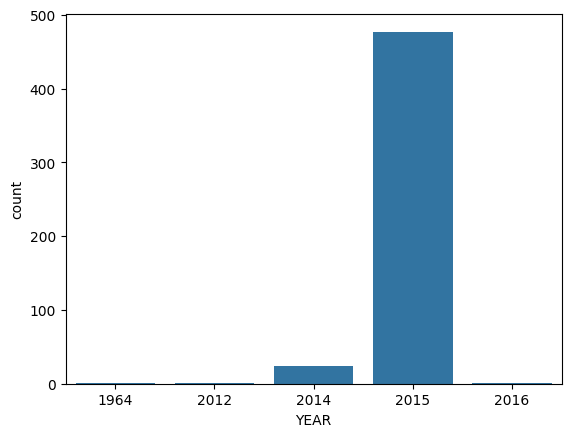

In [23]:
sns.countplot(data=df,x='YEAR');

regarde les films qui ont plus de votes

In [25]:
df.nlargest(5,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey,4.0,3.9,34846,2015
1,Jurassic World,4.5,4.5,34390,2015
2,American Sniper,5.0,4.8,34085,2015
3,Furious 7,5.0,4.8,33538,2015
4,Inside Out,4.5,4.5,15749,2015


In [ ]:
df[df['VOTES']==0]['VOTES'].count() # nombre de film qui n'ont pas de votes

np.int64(69)

In [32]:
df_voted = df[df['VOTES']>0] # le but est analysé les films qui ont au moins un vote

Une écart observé pour le nombre d'étoiles et le note réelle

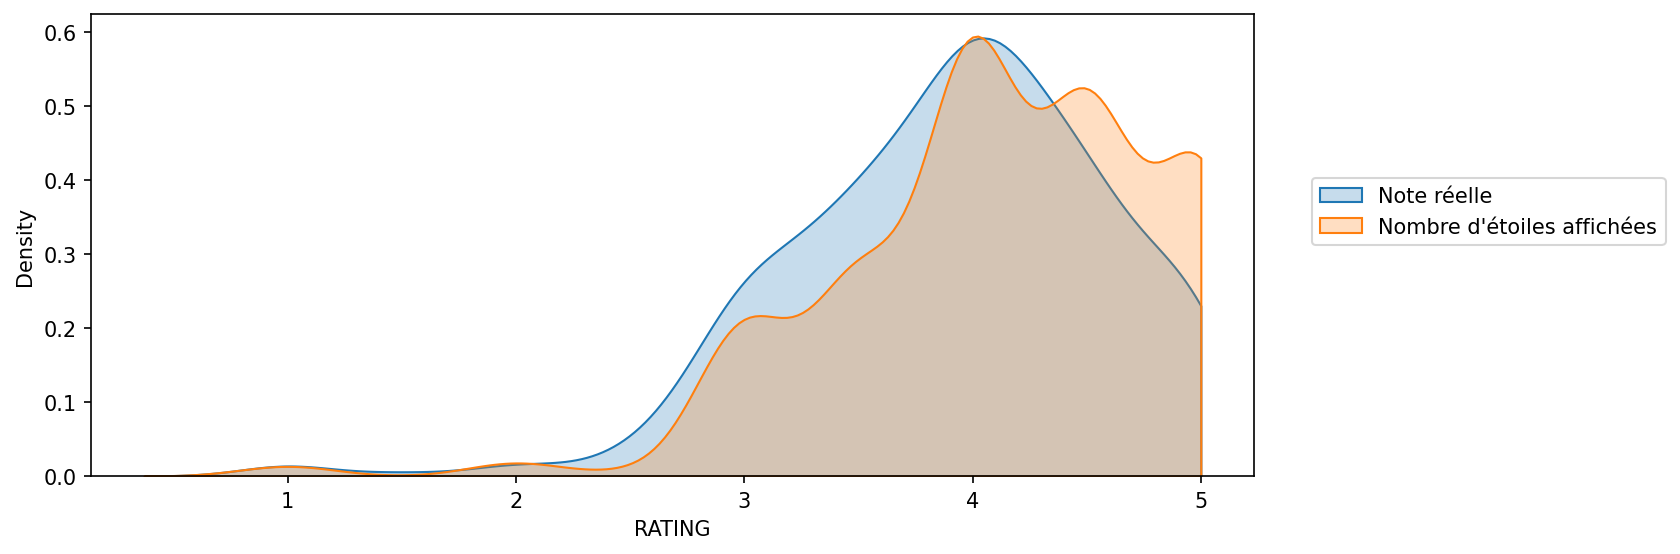

In [34]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=df_voted,x='RATING',clip=[0,5],fill=True,label="Note réelle")
sns.kdeplot(data=df_voted,x='STARS',clip=[0,5],fill=True,label="Nombre d'étoiles affichées")

plt.legend(loc=(1.05,0.5));

In [36]:
# quantifié la différence entre les notes réelles et les étoiles affichées
df_voted['RATING_DIFF'] = np.abs(df_voted['RATING'] - df_voted['STARS']).round(2)
df_voted.head(5)

,FILM,STARS,RATING,VOTES,YEAR,RATING_DIFF
0,Fifty Shades of Grey,4.0,3.9,34846,2015,0.1
1,Jurassic World,4.5,4.5,34390,2015,0.0
2,American Sniper,5.0,4.8,34085,2015,0.2
3,Furious 7,5.0,4.8,33538,2015,0.2
4,Inside Out,4.5,4.5,15749,2015,0.0


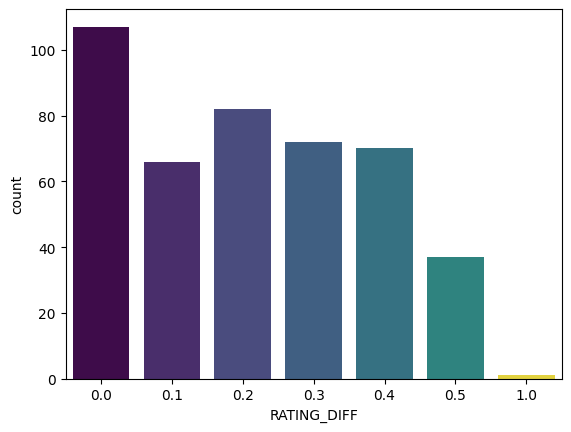

In [39]:
sns.countplot(data=df_voted,x='RATING_DIFF',hue='RATING_DIFF',palette='viridis',legend=False);

In [41]:
# une différence de 1 ou plus est observé
df_voted[df_voted['RATING_DIFF']>=1]

,FILM,STARS,RATING,VOTES,YEAR,RATING_DIFF
381,Turbo Kid,5.0,4.0,2,2015,1.0


on va procéder au analyse sur les data de même but mais depuis différence source pour continue notre études

In [61]:
df1 = pd.read_csv('data/all_sites_scores.csv')
df1['FILM'] = df1['FILM'].str.replace(r'\s*\(\d+\)', '', regex=True)
df1.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron,74,86,66,7.1,7.8,1330,271107
1,Cinderella,85,80,67,7.5,7.1,249,65709
2,Ant-Man,80,90,64,8.1,7.8,627,103660
3,Do You Believe?,18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2,14,28,29,3.4,5.1,88,19560


In [44]:
print('les valeurs manquantes :', df1.isna().sum().sum())
print('les doublons :', df1.duplicated().sum())

les valeurs manquantes : 0
les doublons : 0


### Rotten Tomatoes
Jetons d'abord un coup d'œil à Rotten Tomatoes. RT a deux séries de critiques, leurs critiques (évaluations publiées par les critiques officielles) et les avis des utilisateurs.

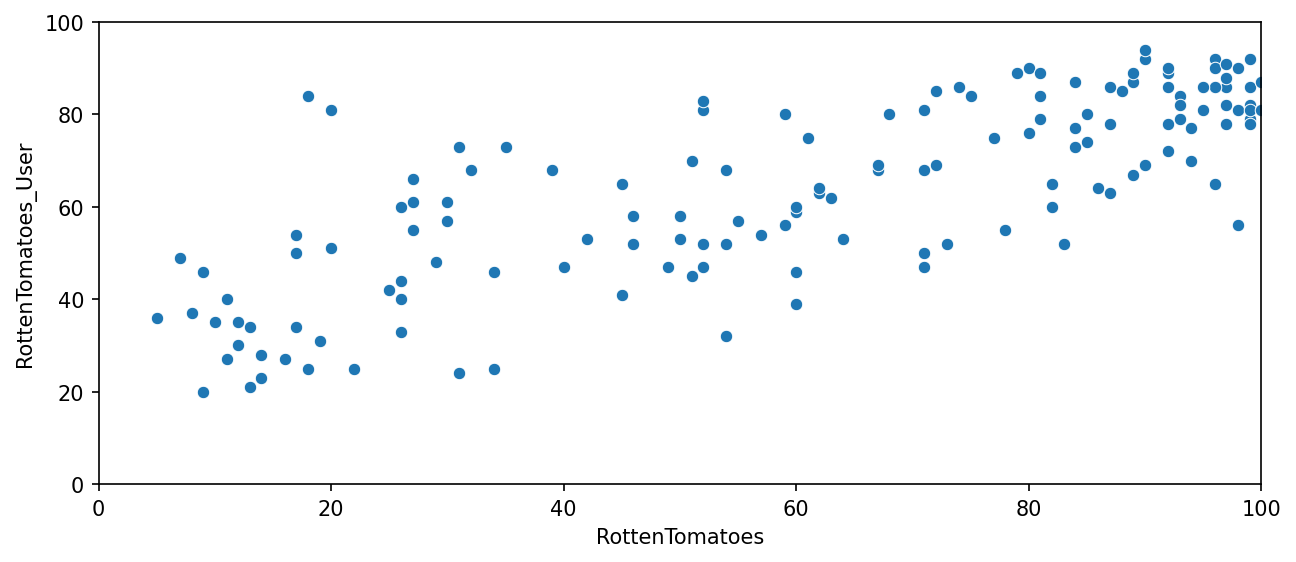

In [45]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df1,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100);

Quantifions cette différence en comparant les notes des critiques et celles des utilisateurs RT. Nous allons calculer cela avec RottenTomatoes-RottenTomatoes_User.

Remarque : Rotten_Diff est ici RottenTomatoes (notes des critiques de RT) - RottenTomatoes_User (notes des utilisateurs de RT). Les valeurs proches de 0 signifient donc un accord entre les critiques et les utilisateurs. Des valeurs positives plus élevées signifient que les critiques ont obtenu une note beaucoup plus élevée que les utilisateurs. Des valeurs négatives plus élevées signifient que les utilisateurs ont obtenu une note beaucoup plus élevée que les critiques

In [49]:
df1['Rotten_Diff']  = df1['RottenTomatoes'] - df1['RottenTomatoes_User'].round(2)
print('la moyenne de la différence :', df1['Rotten_Diff'].mean())
df1.head(5)

la moyenne de la différence : -3.0273972602739727


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


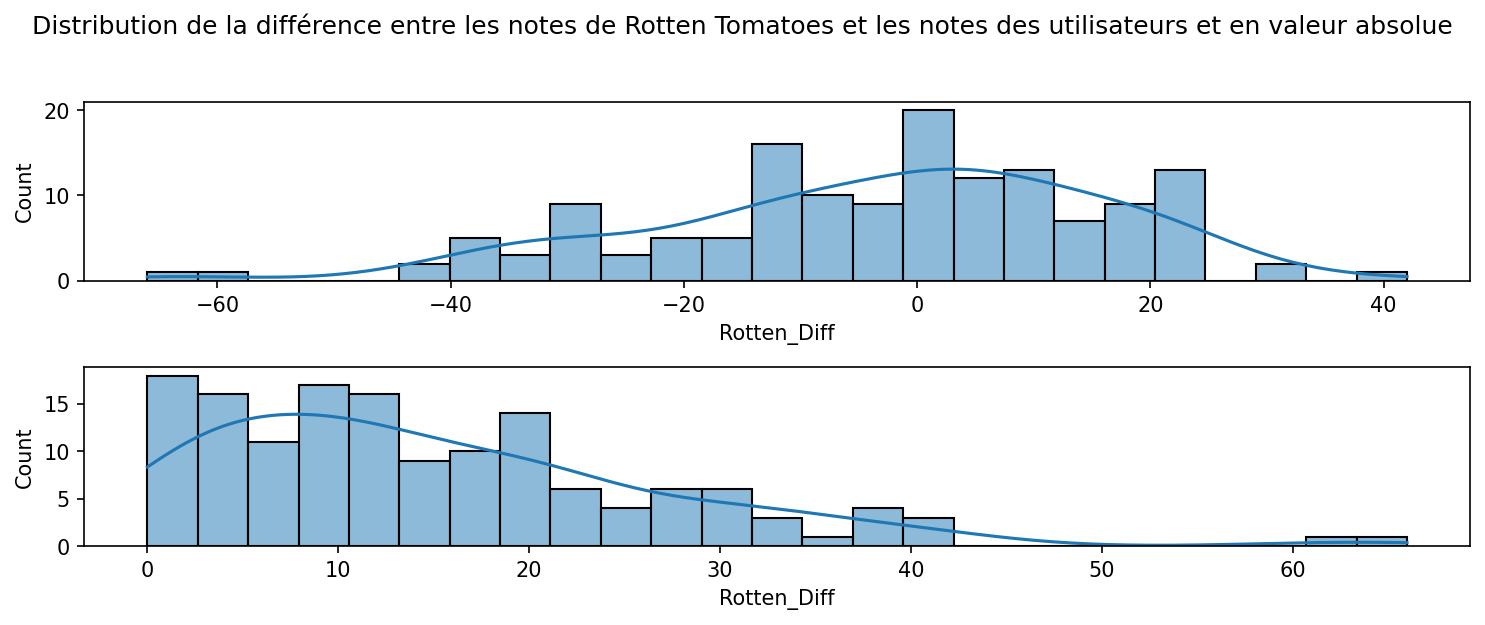

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(10,4), dpi=150)
plt.suptitle('Distribution de la différence entre les notes de Rotten Tomatoes et les notes des utilisateurs et en valeur absolue', y=1.03)
sns.histplot(data=df1,x='Rotten_Diff',kde=True, bins=25,ax=axes[0])
sns.histplot(x=np.abs(df1['Rotten_Diff']),kde=True,bins=25,ax=axes[1])

plt.tight_layout()
plt.show();

In [55]:
print("Les utilisateurs adorent mais les critiques détestent")
df1.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Les utilisateurs adorent mais les critiques détestent


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [56]:
print("Les critiques adorent, mais les utilisateurs détestent")
df1.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Les critiques adorent, mais les utilisateurs détestent


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### MetaCritic
Regardons maintenant les notes de MetaCritic. MetaCritic affiche également une note moyenne des utilisateurs par rapport à leur note officielle affichée.

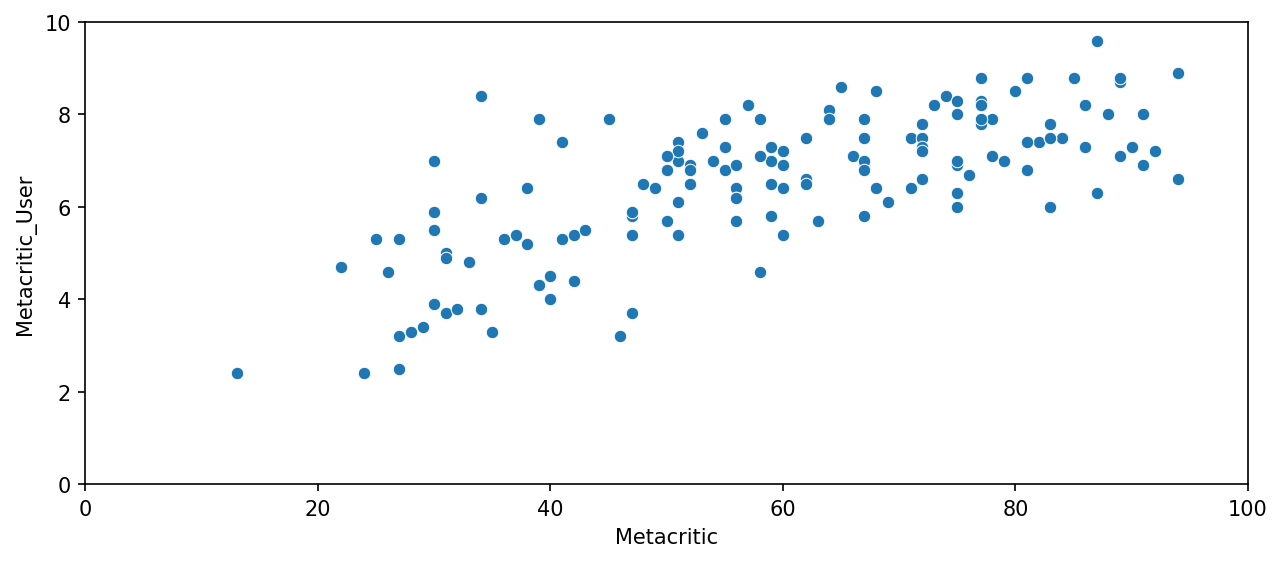

In [57]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df1,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10);

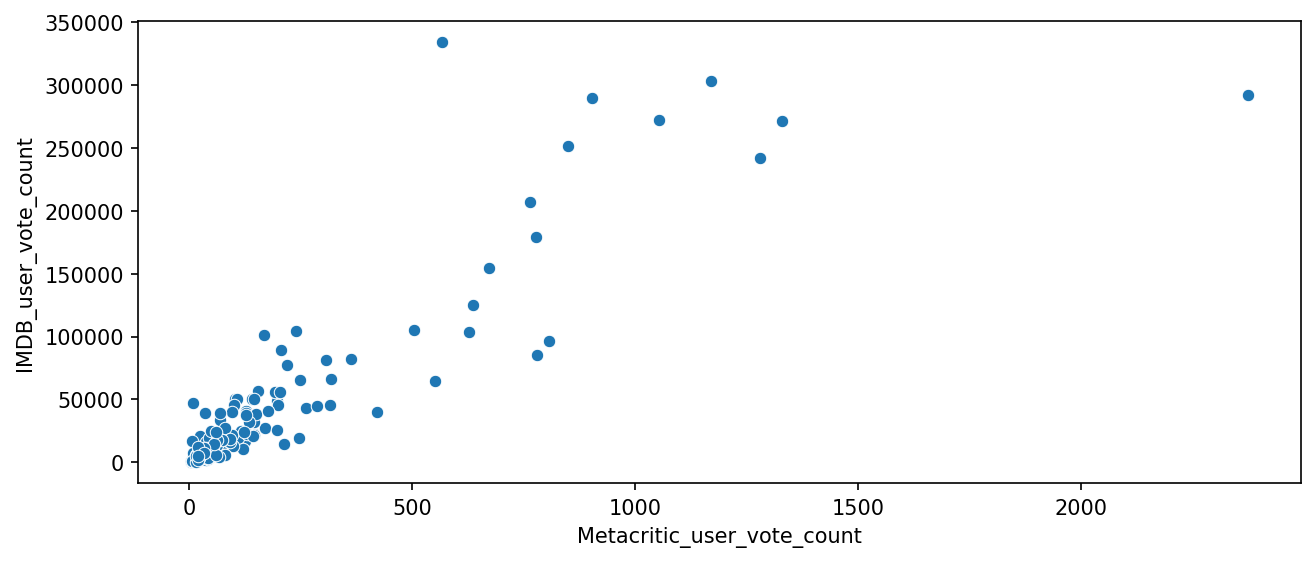

In [58]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df1,x='Metacritic_user_vote_count',y='IMDB_user_vote_count');

### fandango vs all sites scores comparison

In [62]:
df_final = pd.merge(df,df1, on='FILM', how='inner')
df_final.head(5)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey,4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506
1,Jurassic World,4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807
2,American Sniper,5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856
3,Furious 7,5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211
4,Inside Out,4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252


### Normalisation des colonnes comme celles de STARS et RATINGS de Fandango sur l'échelle 0-5

In [64]:
df_final['RT_Norm'] = np.round(df_final['RottenTomatoes']/20,1)
df_final['RTU_Norm'] =  np.round(df_final['RottenTomatoes_User']/20,1)
df_final['Meta_Norm'] =  np.round(df_final['Metacritic']/20,1)
df_final['Meta_U_Norm'] =  np.round(df_final['Metacritic_User']/2,1)
df_final['IMDB_Norm'] = np.round(df_final['IMDB']/2,1)
df_final.head(5)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey,4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,1.2,2.1,2.3,1.6,2.1
1,Jurassic World,4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,3.6,4.0,3.0,3.5,3.6
2,American Sniper,5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,3.6,4.2,3.6,3.3,3.7
3,Furious 7,5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,4.0,4.2,3.4,3.4,3.7
4,Inside Out,4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,4.9,4.5,4.7,4.4,4.3


In [66]:
norm_scores = df_final[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


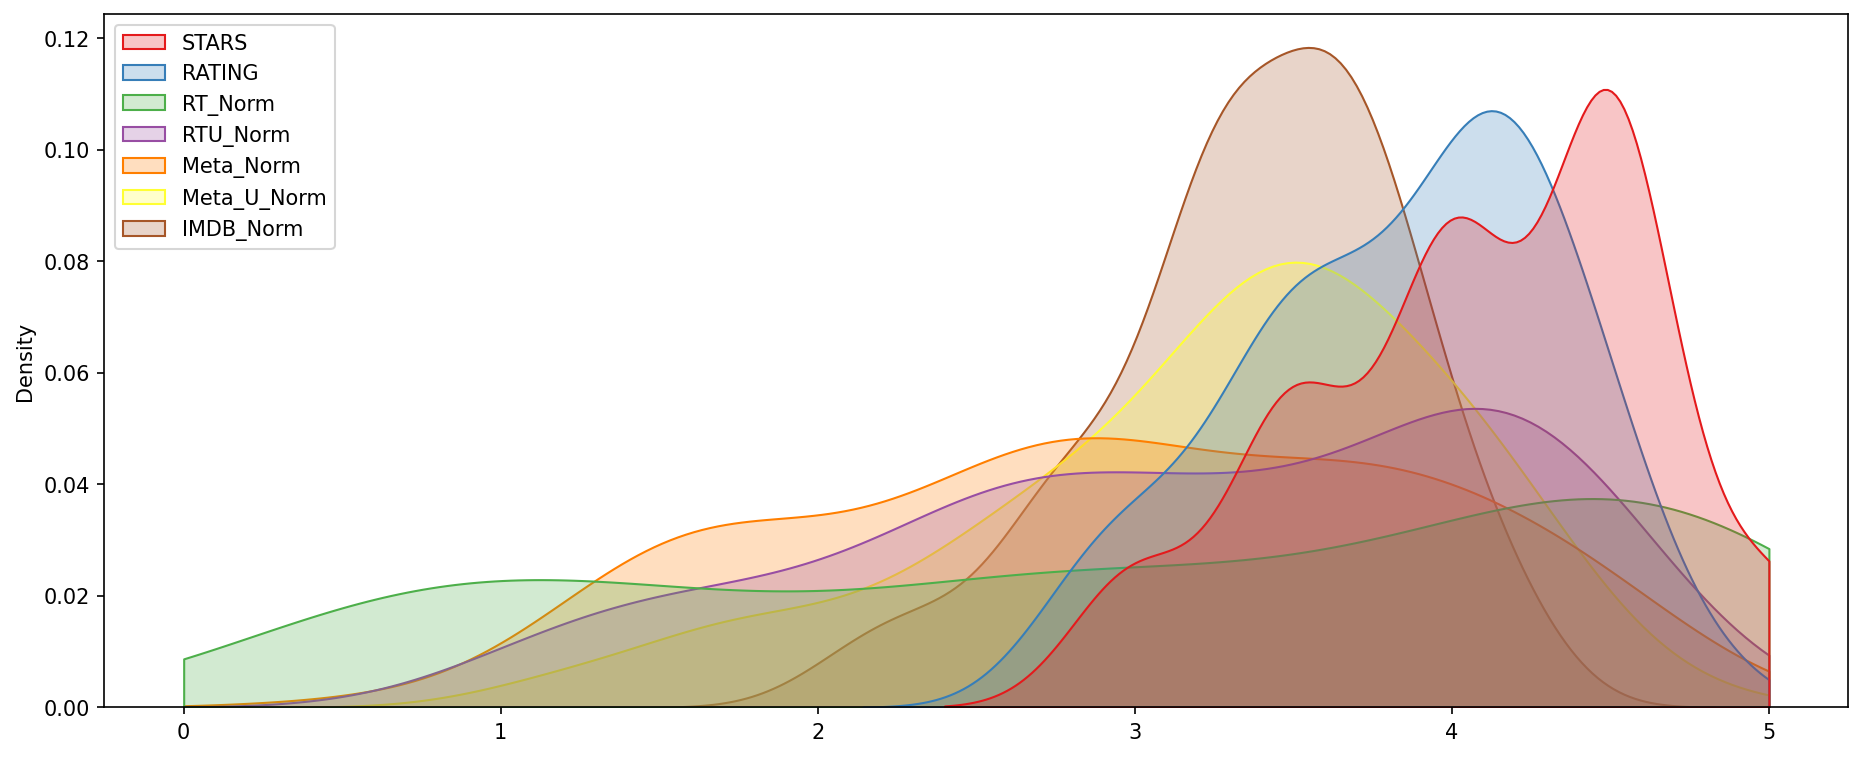

In [68]:
plt.figure(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],fill=True,palette='Set1')
plt.show();

Il est clair que la distribution de Fandango est inégale. Nous pouvons également constater que les critiques de RT ont la distribution la plus uniforme. Comparons directement ces deux-là.

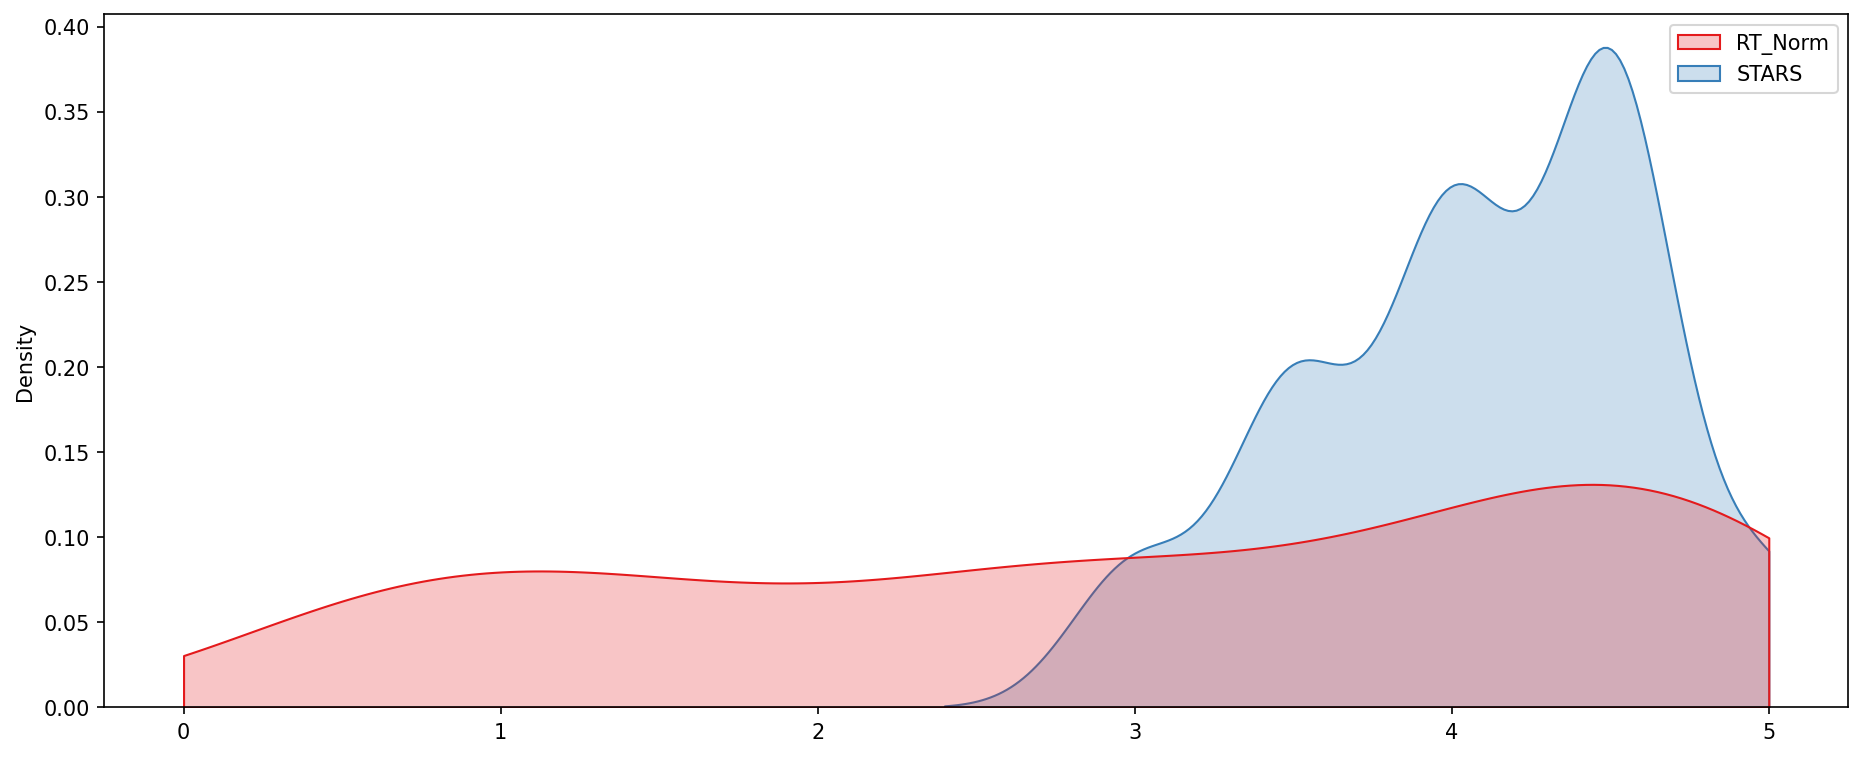

In [69]:
plt.figure(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],fill=True,palette='Set1')
plt.show();

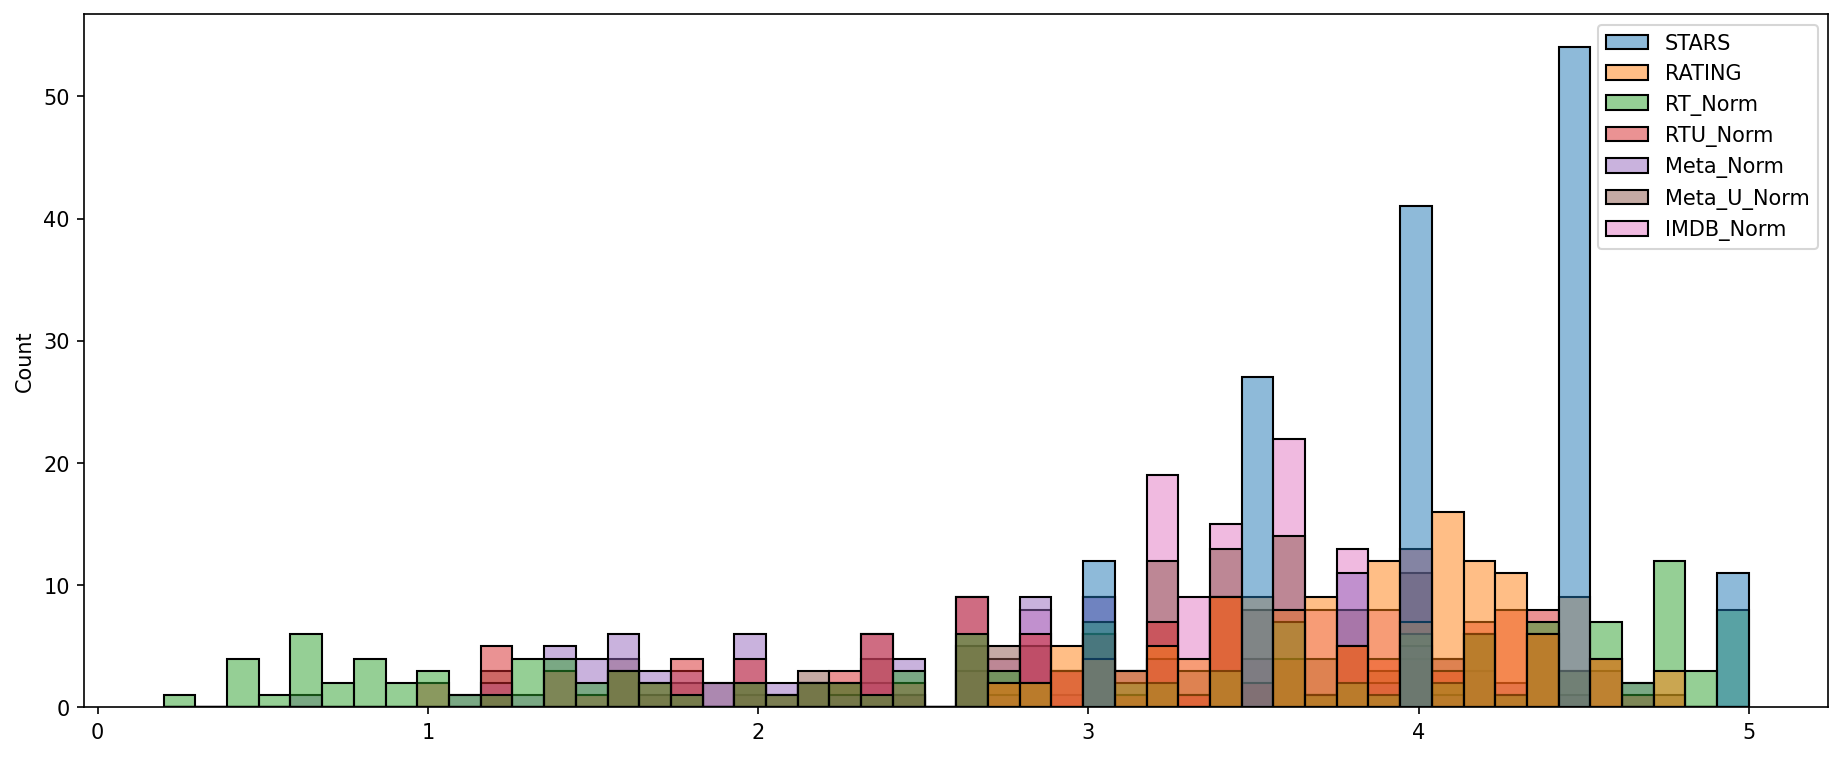

In [70]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm_scores,bins=50);

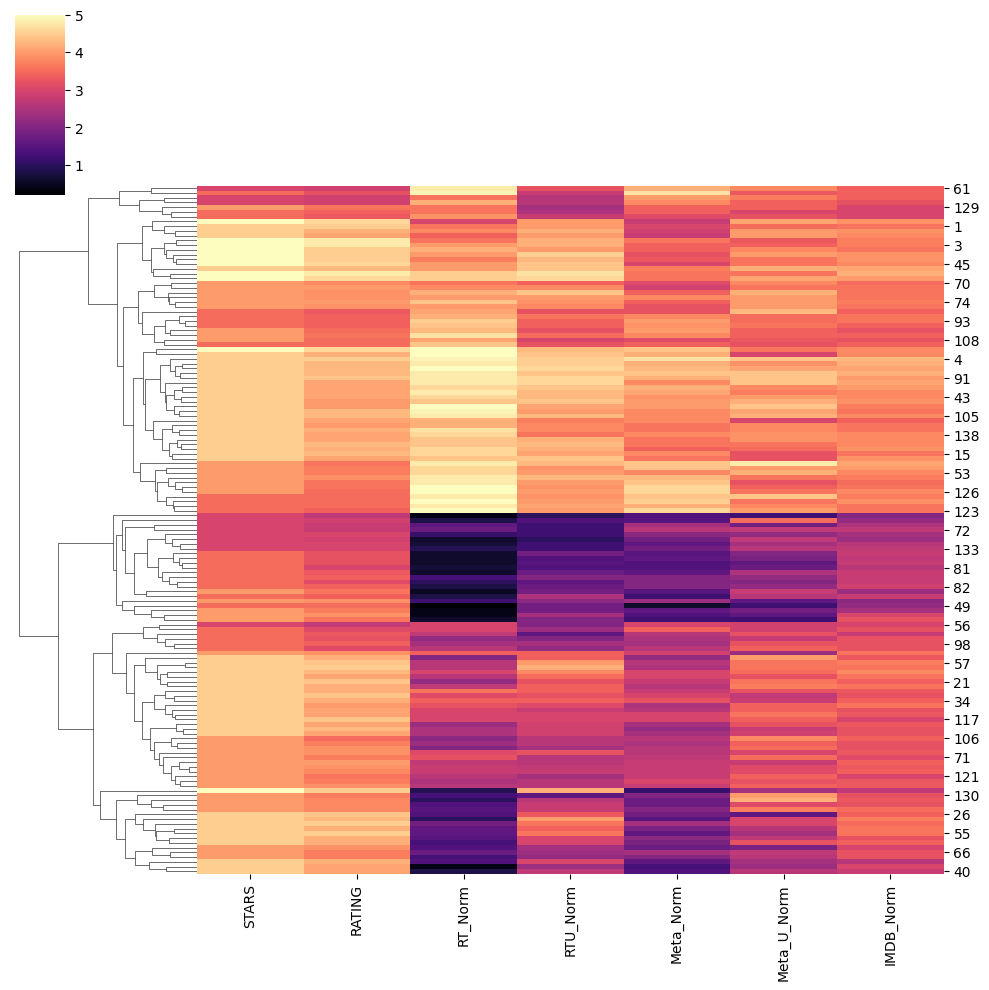

In [71]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False);

In [73]:
norm_films = df_final[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business


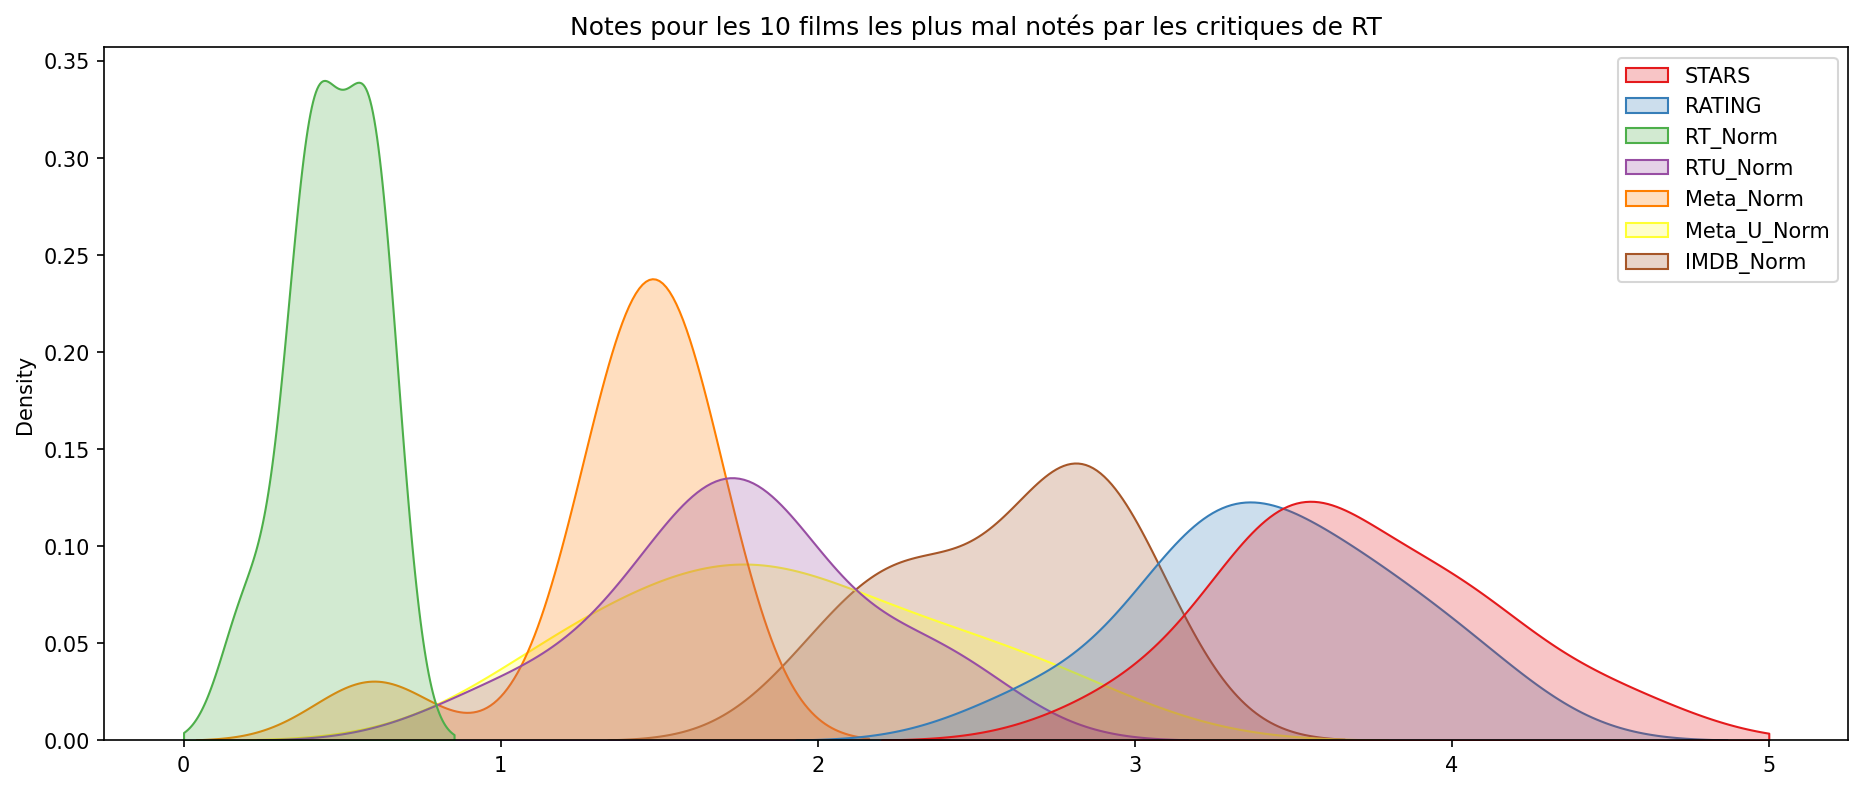

In [74]:
print('\n\n')
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
# sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
sns.kdeplot(data=worst_films,clip=[0,5],fill=True,palette='Set1')
plt.title("Notes pour les 10 films les plus mal notés par les critiques de RT");

In [76]:
pd.DataFrame(norm_films.iloc[25])

,25
STARS,4.5
RATING,4.1
RT_Norm,0.4
RTU_Norm,2.3
Meta_Norm,1.3
Meta_U_Norm,2.3
IMDB_Norm,3.0
FILM,Taken 3


une preuve que sur fandango est mieux noté les film que les autre